# Estadística Aplicada
Producto Integrador de Aprendizaje, a 23 de noviembre de 2023

Grupo 41

#### **Equipo pandas**
- Carlos Arriaga, Jessica Patricia - 1951946
- Cruz Alonso, Leidy Laura - 1950261
- Hurtado Trejo, Carlos de Jesús - 1963732
- Ruiz Rodriguez, Patricio - 1897914
- Ulloa Gamez, Aaron Eduardo - 1953392

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import CoxPHFitter

In [119]:
datos =pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
datos

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


**____________________________________________________________________________________________________________________________________________________**

**INTRODUCCION** 
**____________________________________________________________________________________________________________________________________________________**

**____________________________________________________________________________________________________________________________________________________**

**Punto 1** Hablaras del problema de supervivencia que te toco analizar: ¿qué mide? ¿cuál es el evento? ¿qué tiempo es el que se mide? 
**____________________________________________________________________________________________________________________________________________________**

¿Qué mide?
Mide el credito pagado por los usuarios, ya sea que sea haya pagado ya o aun no esté liquidado, al igual que los meses que lleva de prestamo sin pagar y la cantidad registrada por prestamo para cada usuario.

¿Cuál es el evento?
El evento es el "estado de pago" de los clientes, ya sea que haya pagado o no.

¿Qué tiempo es el que mide?
El tiempo que mide es el lapso que tarda el usuario en liquidar el pago del prestamo dado por el banco.

**____________________________________________________________________________________________________________________________________________________**

**Punto 2** Comenta quien podría estar interesado en el análisis de supervivencia de tu base de datos, y por qué consideras importante realizar un modelo de supervivencia para tu base de datos (¿qué nos permite conocer o saber?)
**____________________________________________________________________________________________________________________________________________________**

El interés sería de asociaciones de bancos o prestamistas ya que nuestra base de datos ayudaria a saber si los usuarios pagan o no pagan dependiendo del monto que se haya pedido como prestamo y los meses que tarde en liquidar el prestamo, el modelo de supervivencia es importante ya que nos premitiria conocer el modelo ideal o caracteristicas de los usuarios que cumplen con los pagos de los prestamos pedidos y tener una tasa mas baja de errores con usuarios poco confiables.

**____________________________________________________________________________________________________________________________________________________**

**Punto 3** Comenta si tu base de datos posee censura (y en su caso qué significa la censura para tu base de datos en particular)
**____________________________________________________________________________________________________________________________________________________**

Nuestra base de datos no contiene datos censurados en nuestras variables de interés (meses e historia_crediticia). De haberlos significaría que nuestra base estaría desactualizada o que hubo bajas (muertes) de clientes en el transcurso del tiempo.

**____________________________________________________________________________________________________________________________________________________**

**Punto 4** Cerciórate de  no  tener  missing  values o  valores  repetidos,  en  caso  de tenerlos corrige la base de datos.
**____________________________________________________________________________________________________________________________________________________**

In [120]:
# Verificar que no haya missing values, en caso de haberlos decidir imputar o eliminar.

datos.isnull().sum()

saldo_cuenta                 0
meses                        0
historia_crediticia          0
uso                          0
cantidad                     0
saldo_cuenta_ahorro        183
años_trabajando              0
tasa_de_interes              0
genero_estado_civil          0
aval                       948
años_actual_domicilio        0
activos                      0
edad                         0
planes_de_pago             814
casa                         0
numero_creditos              0
situacion_laboral            0
dependientes_economicos      0
telefono                     0
extranjero                   0
credito_pagado               0
dtype: int64

In [121]:
datos.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [122]:
#Verificar que no haya valores duplicados
datos.duplicated().sum()

0

In [123]:
#Eliminamos los missing values
datos = datos.fillna('empty')
datos.isnull().sum()

saldo_cuenta               0
meses                      0
historia_crediticia        0
uso                        0
cantidad                   0
saldo_cuenta_ahorro        0
años_trabajando            0
tasa_de_interes            0
genero_estado_civil        0
aval                       0
años_actual_domicilio      0
activos                    0
edad                       0
planes_de_pago             0
casa                       0
numero_creditos            0
situacion_laboral          0
dependientes_economicos    0
telefono                   0
extranjero                 0
credito_pagado             0
dtype: int64

**____________________________________________________________________________________________________________________________________________________**

**Punto 5** Convierte las variables categóricas a dummies.
**____________________________________________________________________________________________________________________________________________________**

In [124]:
datos.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [125]:
## Hacemos conversión de variables categóricas a variables dummie en formato int, eliminando la primer dummie.

datos = pd.get_dummies(datos, columns = ['saldo_cuenta_ahorro','casa','historia_crediticia','uso','saldo_cuenta','años_trabajando','genero_estado_civil','aval','activos','planes_de_pago','situacion_laboral'], drop_first = True, dtype = int)
datos.head()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,genero_estado_civil_mujer_no_soltera,aval_empty,activos_otro_tipo,activos_seguro_vida,activos_sin_activos,planes_de_pago_departamental,planes_de_pago_empty,situacion_laboral_desempleado,situacion_laboral_gobierno,situacion_laboral_obrero
0,6,1169,4,4,67,2,1,1,1,1,...,0,1,0,0,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,1,0,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,1,0,0,0,0,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,1,...,0,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0


**____________________________________________________________________________________________________________________________________________________**

**Punto 6** Calcula las estadísticas descriptivas de las variables.
**____________________________________________________________________________________________________________________________________________________**

In [126]:
datos.describe()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,genero_estado_civil_mujer_no_soltera,aval_empty,activos_otro_tipo,activos_seguro_vida,activos_sin_activos,planes_de_pago_departamental,planes_de_pago_empty,situacion_laboral_desempleado,situacion_laboral_gobierno,situacion_laboral_obrero
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.404000,0.963000,0.700000,...,0.310000,0.948000,0.332000,0.23200,0.154000,0.047000,0.814000,0.022000,0.630000,0.2000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.458487,...,0.462725,0.222138,0.471167,0.42232,0.361129,0.211745,0.389301,0.146757,0.483046,0.4002
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


**____________________________________________________________________________________________________________________________________________________**

**Punto 7** Calcula lo siguiente

a)Cuantas variables y cuantas observaciones tienen la base

b)Cuál es el monto promedio de los créditos otorgados por el banco

c)Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad

d)Cuál es la tasa de interés promedio otorgada por el banco

e)Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron

f)Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado 
**____________________________________________________________________________________________________________________________________________________**

**____________________________________________________________________________________________________________________________________________________**

**A)** Cuantas variables y cuantas observaciones tienen la base.
**____________________________________________________________________________________________________________________________________________________**

In [127]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   meses                                   1000 non-null   int64
 1   cantidad                                1000 non-null   int64
 2   tasa_de_interes                         1000 non-null   int64
 3   años_actual_domicilio                   1000 non-null   int64
 4   edad                                    1000 non-null   int64
 5   numero_creditos                         1000 non-null   int64
 6   dependientes_economicos                 1000 non-null   int64
 7   telefono                                1000 non-null   int64
 8   extranjero                              1000 non-null   int64
 9   credito_pagado                          1000 non-null   int64
 10  saldo_cuenta_ahorro_500_a_1000          1000 non-null   int32
 11  saldo_cuenta_ahorr

In [128]:

## Cantidad de variables y observaciones
datos.shape
print('La base tiene', datos.shape[0], 'observaciones y', datos.shape[1], 'variables.')

La base tiene 1000 observaciones y 47 variables.


La base "datos" cuenta con  variables y  observaciones

**____________________________________________________________________________________________________________________________________________________**

**B)** Cuál es el monto promedio de los créditos otorgados por el banco.
**____________________________________________________________________________________________________________________________________________________**

In [129]:
monto_promedio=datos['cantidad'].mean().round(2)
print('El monto promedio de los créditos otorgados es de $',monto_promedio,'euros.')

El monto promedio de los créditos otorgados es de $ 3271.26 euros.


**____________________________________________________________________________________________________________________________________________________**

**C)** Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad.
**____________________________________________________________________________________________________________________________________________________**

In [130]:
tiempo_promedio= datos[datos['credito_pagado'] == 1]["meses"].mean().round(2)

print('El tiempo promedio que se tardaron en pagar el préstamos los que pagaron el préstamo en su totalidad es de:',tiempo_promedio,'meses.')

El tiempo promedio que se tardaron en pagar el préstamos los que pagaron el préstamo en su totalidad es de: 19.21 meses.


**____________________________________________________________________________________________________________________________________________________**

**D)** Cuál es la tasa de interés promedio otorgada por el banco.
**____________________________________________________________________________________________________________________________________________________**

In [131]:
tasa_interes_promedio=datos['tasa_de_interes'].mean().round(2)
print('La tasa de interés promedio otorgada por el banco es de:',tasa_interes_promedio,'%.')

La tasa de interés promedio otorgada por el banco es de: 2.97 %.


**____________________________________________________________________________________________________________________________________________________**

**E)** Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron.
**____________________________________________________________________________________________________________________________________________________**

In [132]:
monto_prom_pagado= datos[datos['credito_pagado'] == 1]['cantidad'].mean().round(2)
tasa_interes_prom_pagado =datos[datos['credito_pagado'] == 1]['tasa_de_interes'].mean().round(2)

print('El monto promedio de los clientes que ya pagaron el préstamo es de: $',monto_prom_pagado,'euros.','\nLa tasa de interés promedio de los clientes que ya pagaron el préstamo es de:',tasa_interes_prom_pagado,'%.')

El monto promedio de los clientes que ya pagaron el préstamo es de: $ 2985.46 euros. 
La tasa de interés promedio de los clientes que ya pagaron el préstamo es de: 2.92 %.


**____________________________________________________________________________________________________________________________________________________**

**F)** Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado.
**____________________________________________________________________________________________________________________________________________________**

In [133]:
monto_prom_pagado= datos[datos['credito_pagado'] == 0]['cantidad'].mean()
tasa_interes_prom_pagado =datos[datos['credito_pagado'] == 0]['tasa_de_interes'].mean()

print('El monto promedio de los clientes que no han pagado el préstamo es de: $',monto_prom_pagado,'euros.','\nLa tasa de interés promedio de los clientes que no han pagado el préstamo es de:',tasa_interes_prom_pagado,'%.')

El monto promedio de los clientes que no han pagado el préstamo es de: $ 3938.1266666666666 euros. 
La tasa de interés promedio de los clientes que no han pagado el préstamo es de: 3.0966666666666667 %.


**____________________________________________________________________________________________________________________________________________________**

**Punto 8** Calcula el tiempo promedio de supervivencia de la base de datos.
**____________________________________________________________________________________________________________________________________________________**

In [144]:
print('El tiempo promedio de supervivencia de la base de datos es de', int(datos.meses.mean(0)), 'meses.')

El tiempo promedio de supervivencia de la base de datos es de 20 meses.


**____________________________________________________________________________________________________________________________________________________**

**Punto 9** Calcula la funcion de supervivencia y graficala utilizando Kaplan-Meier y obten la mediana ¿que significa la mediana?.
**____________________________________________________________________________________________________________________________________________________**

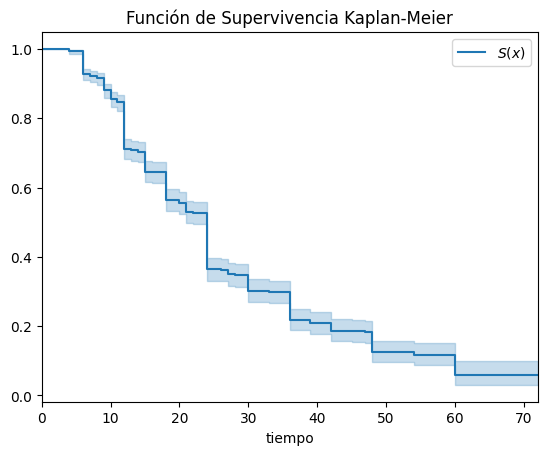

In [135]:
kmdatos = KaplanMeierFitter().fit(datos.meses, datos.credito_pagado)
kmdatos.plot_survival_function(label = '$S(x)$')
plt.title('Función de Supervivencia Kaplan-Meier')
plt.xlabel('tiempo')
plt.xlim(0,72)
plt.show()

In [136]:
print(' La mediana del tiempo de supervivencia es de', int(kmdatos.median_survival_time_), 'meses.\n',
      'Esto significa que la mitad de las clientes han terminado de pagar en el mes 24.')

 La mediana del tiempo de supervivencia es de 24 meses.
 Esto significa que la mitad de las clientes han terminado de pagar en el mes 24.


**____________________________________________________________________________________________________________________________________________________**

**Punto 10** Elige construye una variable (por ejemplo, para la del credito bancario, si debe mas de 500 mil 1, y 0 si debe menos), estima y grafica la funcion de supervivencia por Kaplan-meier para cada grupo.
**____________________________________________________________________________________________________________________________________________________**

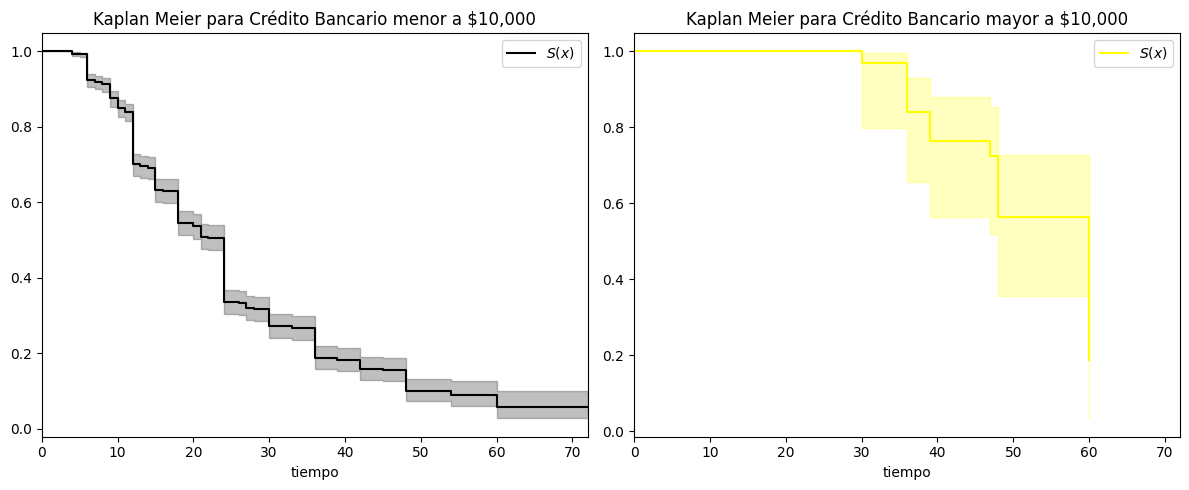

In [145]:
datos['credito_bancario'] = 0
datos.loc[(datos['cantidad'] > 10000), 'credito_bancario'] = 1

menor_10k = datos[datos['credito_bancario'] == 0].copy()
mayor_10k = datos[datos['credito_bancario'] == 1].copy()

kmmenor_10k = KaplanMeierFitter().fit(menor_10k.meses, menor_10k.credito_pagado)
kmmayor_10k = KaplanMeierFitter().fit(mayor_10k.meses, mayor_10k.credito_pagado)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
kmmenor_10k.plot_survival_function(ax = axs[0], label = '$S(x)$', color = 'black')
axs[0].set_title('Kaplan Meier para Crédito Bancario menor a $10,000')
axs[0].set_xlabel('tiempo')
axs[0].set_xlim(0,72)
kmmayor_10k.plot_survival_function(ax = axs[1], label = '$S(x)$', color = 'yellow')
axs[1].set_title('Kaplan Meier para Crédito Bancario mayor a $10,000')
axs[1].set_xlabel('tiempo')
axs[1].set_xlim(0,72)
plt.tight_layout()
plt.show()

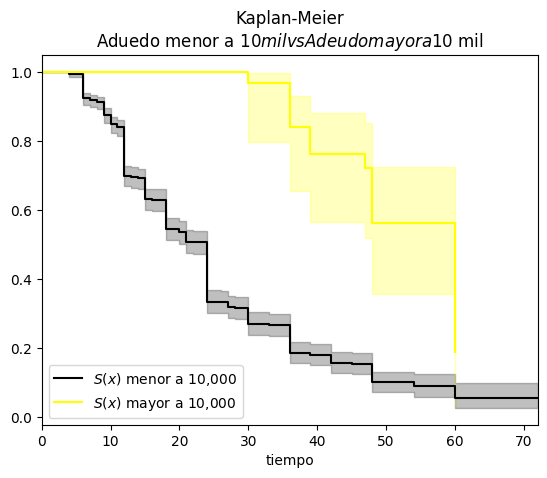

In [146]:
kmmenor_10k.plot_survival_function(label = '$S(x)$ menor a 10,000', color = 'black')
kmmayor_10k.plot_survival_function(label = '$S(x)$ mayor a 10,000', color = 'yellow')
plt.title('Kaplan-Meier\nAduedo menor a $10 mil vs Adeudo mayor a $10 mil')
plt.legend(loc = 'lower left')
plt.xlabel('tiempo')
plt.xlim(0,72)
plt.show()

**____________________________________________________________________________________________________________________________________________________**

**Punto 11** Prueba si las funciones de supervivencia son distintas usando el log rank test y comenta el resultado.
**____________________________________________________________________________________________________________________________________________________**

In [139]:
LRT = logrank_test(menor_10k.meses, mayor_10k.meses, menor_10k.credito_pagado, mayor_10k.credito_pagado)

LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          47.29 <0.005     37.25

In [140]:
if LRT.p_value.round(6) < 0.05:
    print('Rechazamos H0.')
else:
    print('No rechazamos H0.')

Rechazamos H0.


Con el nivel de significancia del 5% podemos concluir que rechazamos $H_0$, y que las funciones son distintas,
tambien que las personas que tienen un adeudo menor a $10,000 duran mas tiempo que las que tienen una adeudo mayor a $10,000
antes del evento, que es terminar de pagar.

**____________________________________________________________________________________________________________________________________________________**

**Punto 12** Ahora estima un modelo de Cox

a)A parte de "tasa de interes" y "cantidad", elige otras cuatro variables que creas que afectan el riesgo del evento.

b)Di si cada una de las 6 variables que elegiste, aumentan/ disminuyen el riesgo del evento y por que?.

c)Realiza las transformaciones adecuadas para utilizar las variables en un modelo de Cox

d)Estima un modelo de Cox con las variables elegidas e interpreta los coeficientes.

**____________________________________________________________________________________________________________________________________________________**

**____________________________________________________________________________________________________________________________________________________**

**A)** A parte de "tasa de interes" y "cantidad", elige otras cuatro variables que creas que afectan el riesgo del evento.
**____________________________________________________________________________________________________________________________________________________**

La variables son número de créditos, historia crediticia, saldo cuenta ahorro, dependientes económicos.

**____________________________________________________________________________________________________________________________________________________**

**B)** Di si cada una de las 6 variables que elegiste, aumentan/ disminuyen el riesgo del evento y por que?.
**____________________________________________________________________________________________________________________________________________________**

Número de Créditos:  Si la cantidad de créditos baja o es mas pequeña, menor será el riesgo de endeudamiento
del cliente a comparación de uno que tiene más de 1 crédito, por lo tanto el riesgo de que ocurra el evento disminuye.

Tasa de Interés: Si la tasa de interes aumenta, el riesgo de que ocurra el evento disminuye, pues si deja pasar una fecha de pago,
el interes entre mas grande más infla la deuda, y podría influir en los pagos periódicos del cliente, haciéndo que este tarde más en pagar.

Cantidad: Aunque depende de otros factores, el riesgo disminuye, pues entre mayor sea el monto del préstamo, tardará más en pagar el préstamo. Por otro lado, el riesgo aumenta, miestras menor sea e monto, porlo que mientras menor sea la cantidad del monto solicitada la pagarán en un menor tiempo.

Historial Crediticio: El riesgo aumenta si la persona tiene un buen historial crediticio.

Saldo Cuenta Ahorro: Entre más dinero el cliente tenga en su cuenta de ahorro mayor es el riesgo de que ocurra el evento (liquidar la deuda).

Dependientes Económicos: Si el cliente tiene dependientes, significa un gasto considerable de su salario para esas personas,
por lo que sus ingresos se desvían a un gasto extra, entonces el riesgo decrece. Si no tiene ningún dependiente, entonces el riesgo crece.

**____________________________________________________________________________________________________________________________________________________**

**C)** Realiza las transformaciones adecuadas para utilizar las variables en un modelo de Cox.
**____________________________________________________________________________________________________________________________________________________**

In [141]:
DatosT = datos[['meses', 'credito_pagado', 'tasa_de_interes', 'cantidad',
             'historia_crediticia_pago_algun_credito', 'historia_crediticia_pago_retrasado',
             'historia_crediticia_sin_creditos', 'historia_crediticia_pago_todos', 'numero_creditos',
             'saldo_cuenta_ahorro_menor_100', 'saldo_cuenta_ahorro_500_a_1000',
             'saldo_cuenta_ahorro_mas_de_1000', 'dependientes_economicos']]

**____________________________________________________________________________________________________________________________________________________**

**D)** Estima un modelo de Cox con las variables elegidas e interpreta los coeficientes.
**____________________________________________________________________________________________________________________________________________________**

In [142]:
DatosTcox = CoxPHFitter()
DatosTcox.fit(DatosT, 'meses', 'credito_pagado')
DatosTcox.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4035.19
         time fit was run = 2023-11-13 04:41:15 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                      
tasa_de_interes                         -0.43       0.65       0.04            -0.50            -0.36                 0.61                 0.70
cantidad                                -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
historia_crediticia_pago_algun_credito  -0.43       0.65       0.10            -0.63            -0.23                 0.53                 0.80
historia_crediticia_pago_retrasado      -0.54       0.58       0.15            -0.83            -0.25                 0.44                 0.78
historia_crediticia_sin_creditos        -1.04       0.35       0.27            -1.57            -0.51                 0.21                 0.60
historia_crediticia_pago_todos          -1.08       0.34       0.23            -1.54            -0.62                 0.21                 0.54
numero_creditos                          0.02       1.02       0.08            -0.14             0.19                 0.87                 1.21
saldo_cuenta_ahorro_menor_100           -0.25       0.78       0.09            -0.42            -0.08                 0.66                 0.92
saldo_cuenta_ahorro_500_a_1000           0.01       1.01       0.16            -0.29             0.32                 0.74                 1.37
saldo_cuenta_ahorro_mas_de_1000          0.12       1.13       0.17            -0.21             0.46                 0.81                 1.59
dependientes_economicos                  0.11       1.12       0.11            -0.10             0.32                 0.91                 1.37

                                         cmp to      z      p   -log2(p)
covariate                                                               
tasa_de_interes                            0.00 -11.63 <0.005     101.43
cantidad                                   0.00 -16.02 <0.005     189.47
historia_crediticia_pago_algun_credito     0.00  -4.14 <0.005      14.83
historia_crediticia_pago_retrasado         0.00  -3.69 <0.005      12.10
historia_crediticia_sin_creditos           0.00  -3.86 <0.005      13.12
historia_crediticia_pago_todos             0.00  -4.61 <0.005      17.93
numero_creditos                            0.00   0.27   0.79       0.34
saldo_cuenta_ahorro_menor_100              0.00  -2.88 <0.005       7.98
saldo_cuenta_ahorro_500_a_1000             0.00   0.07   0.94       0.08
saldo_cuenta_ahorro_mas_de_1000            0.00   0.73   0.47       1.10
dependientes_economicos                    0.00   1.03   0.30       1.73
---
Concordance = 0.78
Partial AIC = 8092.37
log-likelihood ratio test = 468.39 on 11 df
-log2(p) of ll-ratio test = 308.14

**____________________________________________________________________________________________________________________________________________________**

**Punto 13** Interpreta cada uno de los coeficientes obtenidos. Utiliza cph.plot() para ayudarte con la interpretacion.
**____________________________________________________________________________________________________________________________________________________**

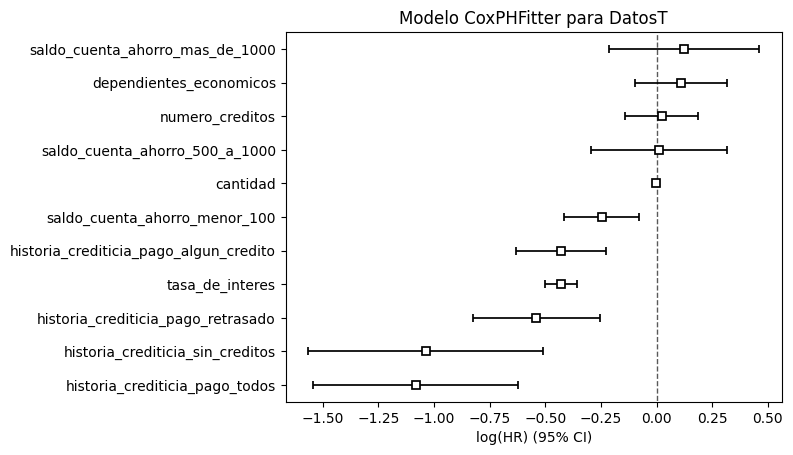

In [143]:
cph = CoxPHFitter()
cph.fit(DatosT, 'meses', 'credito_pagado')
cph.plot()
plt.title('Modelo CoxPHFitter para DatosT')
plt.show()

$\cdot$ Tasa de Interés:

Como $p-valor < 0.05$, se rechaza $H_0$. Esto nos indica que la tasa de interés afecta el riesgo en un 35% de forma decreciente, tardará en liquidar el préstamo por cada ocasión que el interés aumenta.

$\cdot$ Cantidad:

Como $p-valor < 0.05$, se rechaza la hipótesis nula. Esto nos indica que por cada peso MXN que se le presta al cliente, disminuye el riesgo de que pague sus deudas de manera mínima en un 0.1%.

**Historia Crediticia**

$\cdot$ Pagó Algún Crédito:

Como el $p-valor < 0.05$, se rechaza la hipotesis nula. Esto nos indica que el riesgo se reduce en un 35% por cada crédito liquidado en comparación con los que no han pagado su crédito, tardará mas tiempo en liquidar.

$\cdot$ Pago Retrasado:

No rechazamos la hipótesis nula. Esto nos indica que el riesgo disminuye en un 42% por cada crédito atrasado a comparación de los que no han pagado nada.

$\cdot$ Sin Créditos:

Disminuye el riesgo de que el cliente pague sus deudas en un 65%. Esto significa que tardaría más tiempo en terminar de pagar algún crédito, comparado con los que no han pagado.

$\cdot$ Pagó Todos:

Disminuye el riesgo de manera notoria por cada cliente que ha pagado todos sus créditos en un 66% contra los que no han pagado sus créditos.

$\cdot$ Número de Créditos:

El $p-valor > 0.05$, no se rechaza la hipótesis nula. Esto nos indica que la cantidad de préstamos no afecta al riesgo de que el cliente vaya a concluir los pagos.

$\cdot$ Ahorro menor a $100:

Rechazamos $H_0$. Esto nos indica que tener un ahorro menor a $100 sí influye en el evento en un 22% comparado contra los que tienen un ahorro de $100 a $500. Los que tengan este ahorro tardarán más tiempo en terminar de realizar sus pagos.

$\cdot$ Ahorro $500 a $1,000:

No rechazamos la hipótesis nula. Esto significa que tener un ahorro entre $500 y $1,000, no influye en el hecho de terminar de realizar los pagos del préstamo comparado contra los que tienen un ahorro de $100 a $500.

$\cdot$ Ahorro mas de $1,000:

No rechazamos la hipotesis nula. Esto significa que tener un ahorro de mas de $1,000 no inlfuye en la ocurrencia del evento esperado.

$\cdot$ Dependientes Económicos:

Rechazamos $H_0$, significa que tener dependientes económicos no inluye en el riesgo de terminar de pagar los créditos.

**____________________________________________________________________________________________________________________________________________________**

**Punto 14** Con base en los calculos realizados, redacta un comentario integral de por lo menos 250 palabras que resuma el analisis, reflexiones y recomendaciones sobre la politica de otorgamiento de creditos en el Banco de la Ilusion.
**____________________________________________________________________________________________________________________________________________________**

En resumen, al analizar la base de datos observamos que la probabilidad de que un cliente termine de pagar un préstamo está vinculada a su historial crediticio y el saldo de su cuenta de ahorro. En contraparte, la presencia de un historial crediticio sin préstamos previos sugiere un riesgo decreciente, mostrando que el cliente tomará más tiempo en saldar sus deudas. Esto sucede ya que aquellos que nunca han solicitado un préstamo presentan un mayor riesgo de incumplimiento en sus pagos.

De igual forma, aquellos con cuentas de ahorro inferiores a $100 también muestran una tendencia a demorarse en la liquidación de sus préstamos. En nuestra evaluación, hemos concluido que los clientes con un historial crediticio sólido y aquellos que mantienen un saldo en su cuenta de ahorro superior a $100 tienen un riesgo significativamente mayor de completar el pago de su préstamo más rápidamente.

Los clientes que carecen de estas características tomarán más tiempo en cumplir con sus obligaciones crediticias. Esta situación podría generar problemas directos entre la empresa y el cliente.

En conclusión, se recomienda que, al considerar la aprobación de un crédito, se prioricen aquellos solicitantes que cumplan con al menos una de las características mencionadas anteriormente: poseer una cuenta de ahorro con un saldo superior a $100 o contar con un historial crediticio ordenado. Este enfoque ayudará a reducir el riesgo asociado con el evento esperado, garantizando una mayor probabilidad de que los clientes tarden en completar el pago de sus préstamos.

**____________________________________________________________________________________________________________________________________________________**

**Punto 15** Por ultimo, investiga y señala las limitaciones de Kaplan-Meier y del modelo de Cox.
**____________________________________________________________________________________________________________________________________________________**

Las limitaciones serían 

$\cdot$ Proporcionalidad de riesgos:

El modelo de Cox asume proporcionalidad de riesgos. Esto significa que el efecto de una variable en el riesgo de eventos es constante a lo largo del tiempo. Esto podría ser inadecuado en dado caso que no se cumpla.

$\cdot$ Colinealidad:

La colinealidad entre las variables independientes puede afectar la precisión de las estimaciones de los coeficientes y la interpretación de los efectos individuales.

$\cdot$ Censura no informativa:

Tal como con Kaplan-Meier, el modelo de Cox también asume censura no informativa para que las estimaciones sean válidas.

$\cdot$ Modelo aditivo:

El modelo de Cox asume que los efectos de las variables son aditivos en la escala del riesgo logarítmico. Si las interacciones son significativas, el modelo puede no capturar completamente la complejidad de la relación entre las variables y la supervivencia.

$\cdot$ Influencia de observaciones atípicas:

Las observaciones atípicas pueden llegar a tener una gran influencia en las estimaciones del modelo, en especial si contamos con datos pequeños.

$\cdot$ Modelo lineal:

El modelo de Cox asume linealidad en la escala del riesgo logarítmico. El modelo no sería adecuado en dado caso que la relación entre las variables y el riesgo no sea lineal.
Es importante reconocer estas limitaciones al aplicar tanto el método de Kaplan-Meier como el modelo de Cox y considerar cuidadosamente el contexto y las características específicas de los datos en cada aplicación.